In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/space_server_dataset.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


##### Info shows that now single null values present in the dataset and having int and float dtype. Target column is in Obj

### Summery statistic

In [4]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


##### Observation: some of the columns having huge difference between mean and mode i.e 50% percentile so it means some columns have right skewness and left skewness

In [5]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

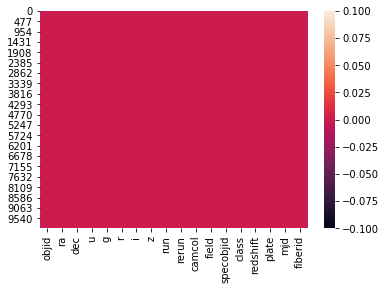

In [6]:
sns.heatmap(df.isnull())

###### heatmap shows that no null values are present in the dataset

#### Lable encoding on Target column

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [8]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [9]:
target=df['class']

#### collecting the categorised columns from the dataset

In [10]:
only_one_categories=[]
categorical=[]
for i in df.columns:
    print("Column name is ",i)
    print(df[i].value_counts(),'\n')
    print(f'\n Total Number of Categoricals in {i} ==> {len(df[i].value_counts())}\n')
    print("==============================")
    if len(df[i].value_counts()) == 1:
        only_one_categories.append(i)
    if len(df[i].value_counts()) < 100 and i not in only_one_categories:
        categorical.append(i)

Column name is  objid
1.237650e+18    10000
Name: objid, dtype: int64 


 Total Number of Categoricals in objid ==> 1

Column name is  ra
226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64 


 Total Number of Categoricals in ra ==> 10000

Column name is  dec
 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64 


 Total Number of Categoricals in dec ==> 10000

Column name is  u
18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64 


 Total Number of Categoricals in u ==> 9730

Column name is  g
17.55623    3
17.75478    3
17.60766  

In [11]:
only_one_categories  #### this columns having single value to all the rows

['objid', 'rerun']

In [12]:
categorical  ### these columns are in categorical form

['run', 'camcol', 'class']

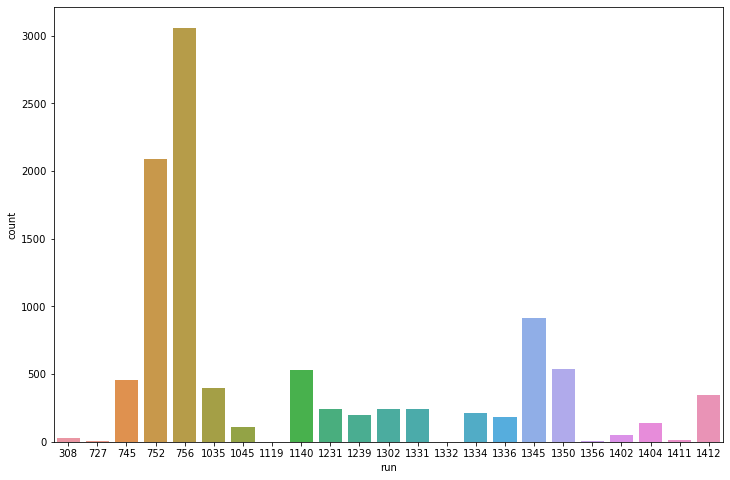

In [13]:
plt.figure(figsize=(12,8))
sns.countplot('run',data=df)

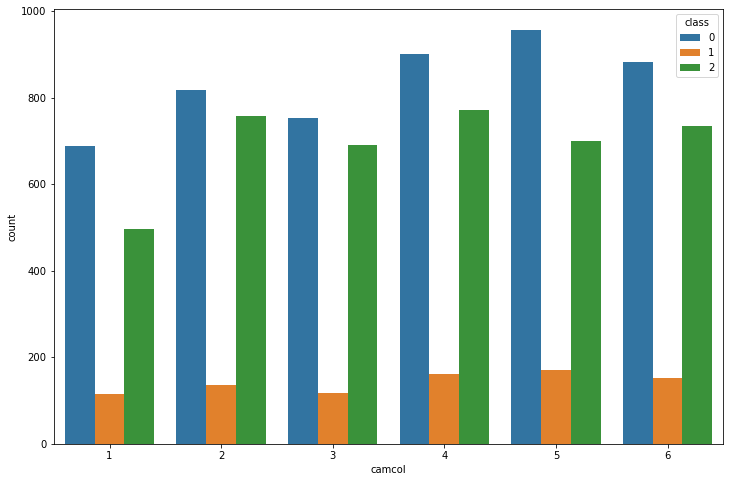

In [14]:
plt.figure(figsize=(12,8))
sns.countplot('camcol',hue='class',data=df)

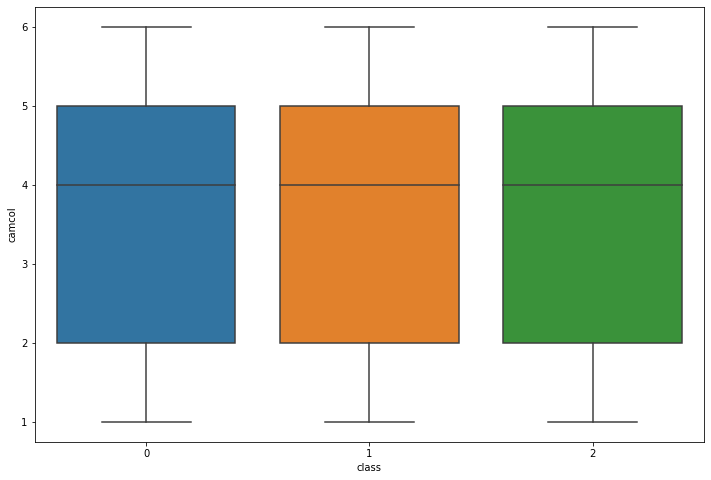

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class',y='camcol',data=df)

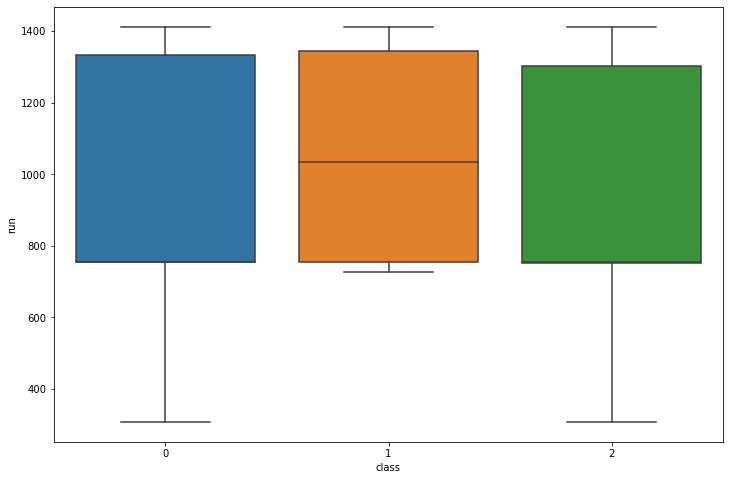

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class',y='run',data=df)

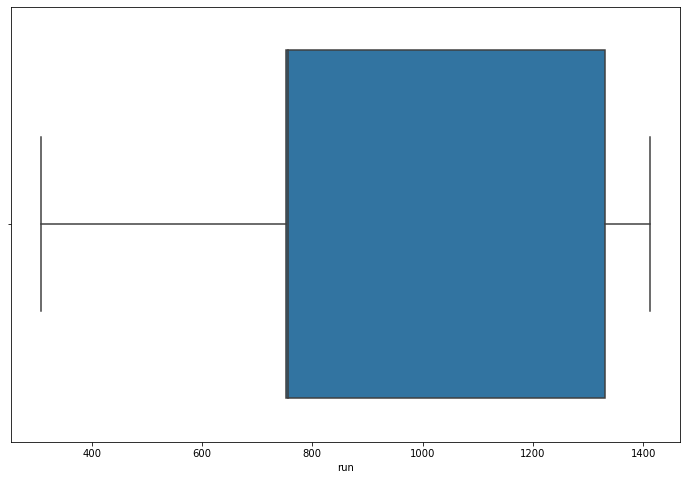

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot('run',data=df)

In [18]:
### No Outliers are present from above observations

##### Box Plot Checking outliers

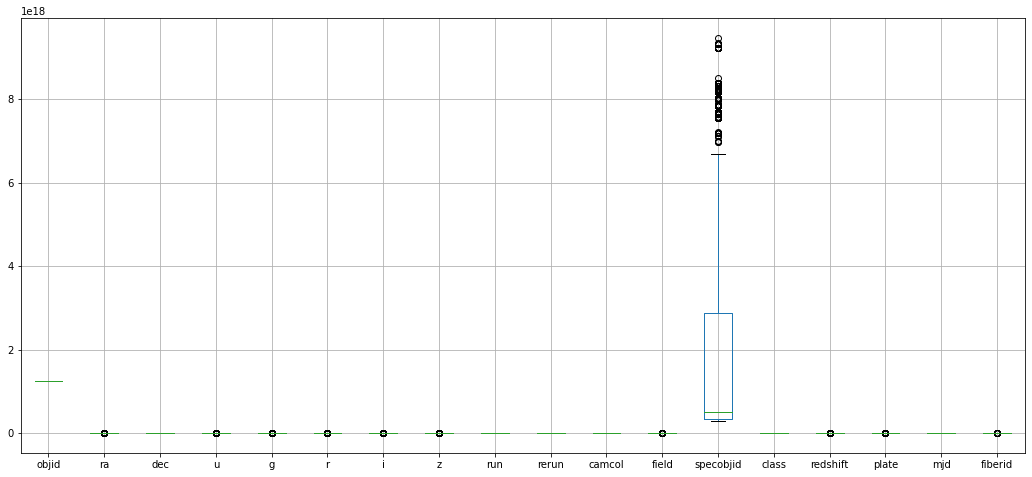

In [19]:
df.boxplot(figsize=(18,8))

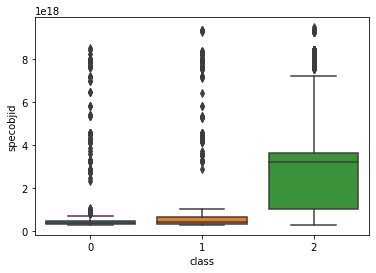

In [20]:
sns.boxplot(x=df['class'],y=df['specobjid'])

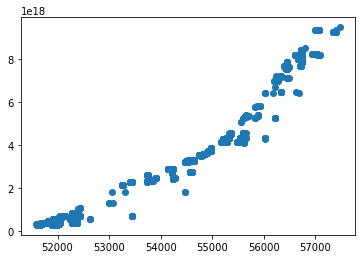

In [21]:
plt.scatter(df['mjd'],df['specobjid'])

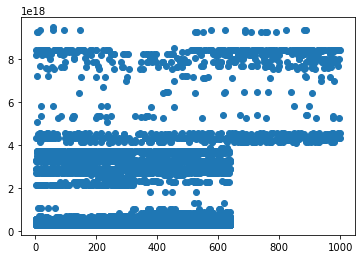

In [22]:
plt.scatter(df['fiberid'],df['specobjid'])

In [23]:
df['specobjid'].max()

9.46883e+18

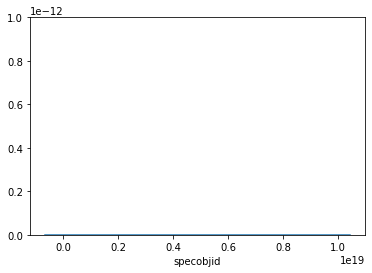

In [24]:
sns.distplot(df['specobjid'],)

In [25]:
# Standardizong the column specobjid 

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
spec=ss.fit_transform(pd.DataFrame(df['specobjid']))
df['specobjid']=spec
df['specobjid'].max()

3.8849083937622813

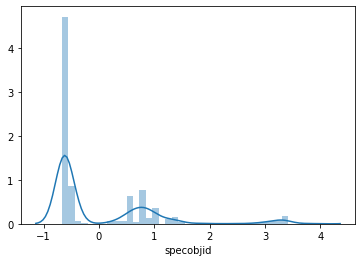

In [27]:
sns.distplot(df['specobjid'])

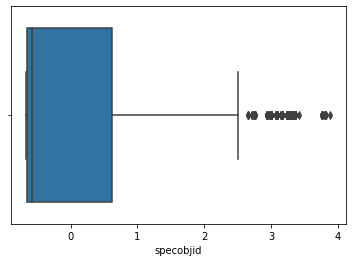

In [28]:
sns.boxplot(df['specobjid'])

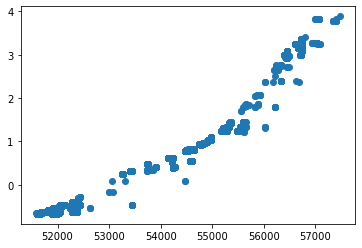

In [29]:
plt.scatter(df['mjd'],df['specobjid'])

###### scatter plot showing that mjd ia heighly correlating with specobjid

### Removing skewness

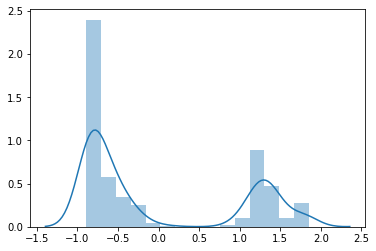

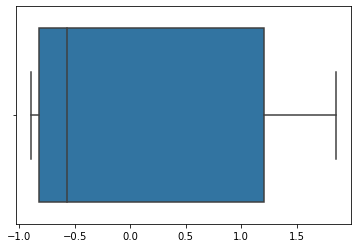

In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
spec=pt.fit_transform(pd.DataFrame(df['specobjid']))
sns.distplot(spec)
plt.show()
sns.boxplot(spec)

In [31]:
df['specobjid']=spec

In [32]:
df['specobjid'].skew()

0.6590392924345136

### Checking and removing skewness in all the columns

In [33]:
lis=[]
for i in df.columns:
    if (i not in only_one_categories) and (i not in categorical):
        print(i,'==>',df[i].skew())
        if np.abs(df[i].skew())>0.66:
            lis.append(i)
lis            

ra ==> -1.2273504070233294
dec ==> 1.1915436677350355
u ==> -1.2197948126863523
g ==> -0.5362927436919477
r ==> -0.021672902438911602
i ==> 0.28644190573920003
z ==> 0.2143128272724939
field ==> 0.24979529914600934
specobjid ==> 0.6590392924345136
redshift ==> 4.26572914322377
plate ==> 1.7946094444631788
mjd ==> 1.0396102031129317
fiberid ==> 0.3080532503622125


['ra', 'dec', 'u', 'redshift', 'plate', 'mjd']

In [34]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.659039
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

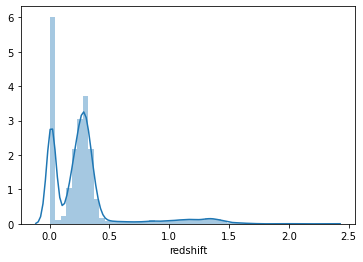

In [35]:
sns.distplot(np.sqrt(df['redshift']))

In [36]:
np.sqrt(df['redshift']).skew()

2.268173025011335

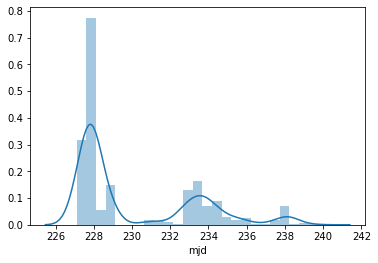

In [37]:
sns.distplot(np.sqrt(df['mjd']))

In [38]:
np.sqrt(df['mjd']).skew()

1.0251841966404796

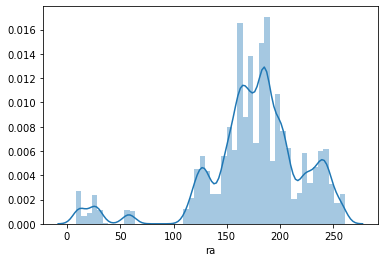

Column Name is ra ==================Before removing Skewness is  -1.2273504070233294


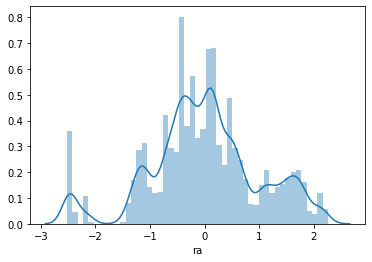

Column Name is ra ====================After removing Skewness is  -0.15457608153492583


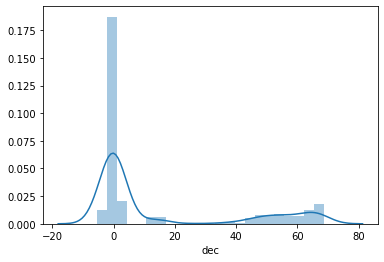

Column Name is dec ==================Before removing Skewness is  1.1915436677350355


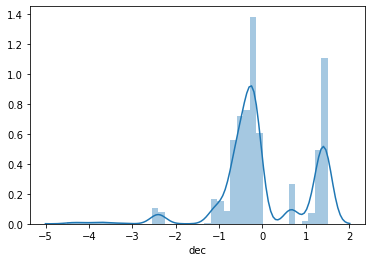

Column Name is dec ====================After removing Skewness is  -0.4832461740287174


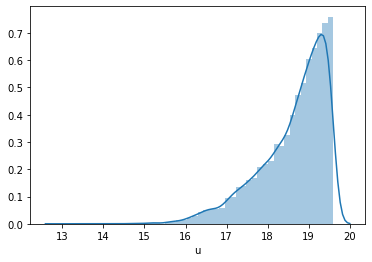

Column Name is u ==================Before removing Skewness is  -1.2197948126863523


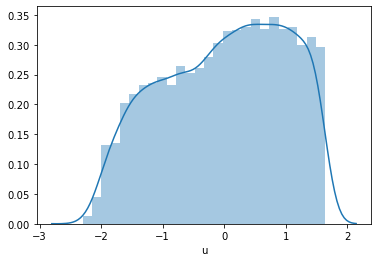

Column Name is u ====================After removing Skewness is  -0.23085706143140353


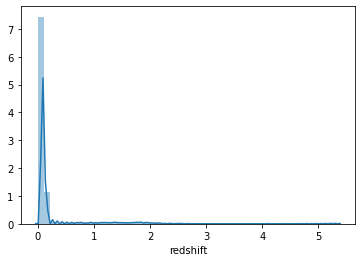

Column Name is redshift ==================Before removing Skewness is  4.26572914322377


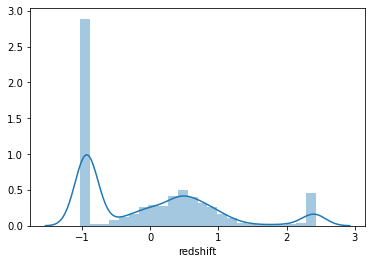

Column Name is redshift ====================After removing Skewness is  0.85876513720573


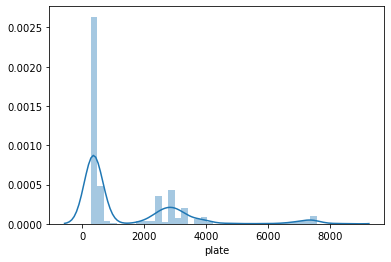

Column Name is plate ==================Before removing Skewness is  1.7946094444631788


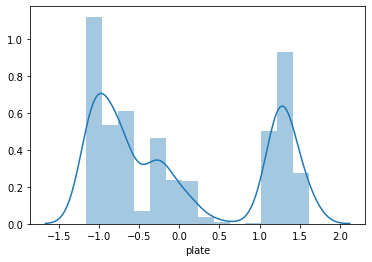

Column Name is plate ====================After removing Skewness is  0.40424157644652214


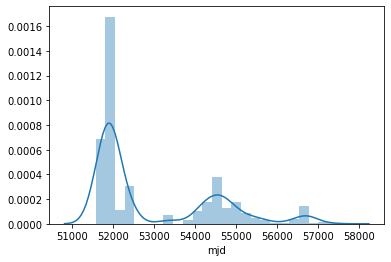

Column Name is mjd ==================Before removing Skewness is  1.0396102031129317


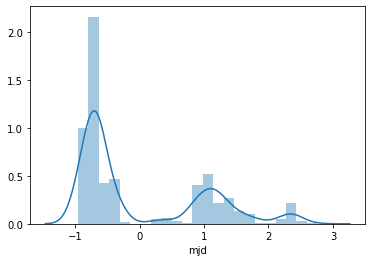

Column Name is mjd ====================After removing Skewness is  0.9390983786424764


In [39]:
for col in lis:
    sns.distplot(df[col])
    plt.show()
    print('Column Name is '+col+' ==================Before removing Skewness is ',df[col].skew())
    df[col] =pt.fit_transform(pd.DataFrame(df[col]),0.5)
    sns.distplot(df[col])
    plt.show()
    print('Column Name is '+col+' ====================After removing Skewness is ',df[col].skew())

In [40]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

### Correlation table 

In [41]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,-3.547177e-17,-3.644254e-16,-6.644036e-17,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-2.488284e-16,-3.355500e-15,-9.984510e-18,2.600217e-16,1.687607e-16,4.665195e-15
ra,-3.547177e-17,1.000000e+00,2.833206e-03,3.451709e-02,4.458956e-02,4.603922e-02,4.391811e-02,4.068596e-02,-7.688970e-02,NaN,-3.092235e-02,6.205178e-01,-1.189228e-01,-4.252333e-02,4.841912e-02,-1.187279e-01,-1.064747e-01,3.470899e-02
dec,-3.644254e-16,2.833206e-03,1.000000e+00,3.126802e-02,5.453505e-02,5.376531e-02,5.019754e-02,4.828523e-02,5.492202e-01,NaN,1.619688e-01,-7.562321e-02,9.675943e-02,-3.613360e-02,5.944186e-02,1.755200e-01,4.509383e-02,1.562025e-01
u,-6.644036e-17,3.451709e-02,3.126802e-02,1.000000e+00,8.127104e-01,6.602864e-01,5.794445e-01,5.245717e-01,3.305221e-02,NaN,9.863362e-03,9.319260e-03,-1.966507e-01,-2.592012e-01,3.679878e-01,-1.963543e-01,-1.656866e-01,8.382883e-03
g,1.001149e-13,4.458956e-02,5.453505e-02,8.127104e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-1.420640e-01,-9.921163e-02,4.597785e-01,-1.426900e-01,-1.011287e-01,4.718739e-02
r,2.995673e-14,4.603922e-02,5.376531e-02,6.602864e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,-5.441997e-02,4.962769e-02,3.784699e-01,-5.644647e-02,-1.671245e-02,6.108141e-02
i,2.212198e-14,4.391811e-02,5.019754e-02,5.794445e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,1.027408e-02,1.467908e-01,3.072161e-01,6.666558e-03,4.447120e-02,6.997739e-02
z,-4.107700e-14,4.068596e-02,4.828523e-02,5.245717e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,5.980781e-02,2.157584e-01,2.547434e-01,5.535810e-02,9.012198e-02,6.797999e-02
run,-1.553011e-14,-7.688970e-02,5.492202e-01,3.305221e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,6.951743e-02,-7.816172e-02,1.030489e-01,1.640502e-01,6.696581e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


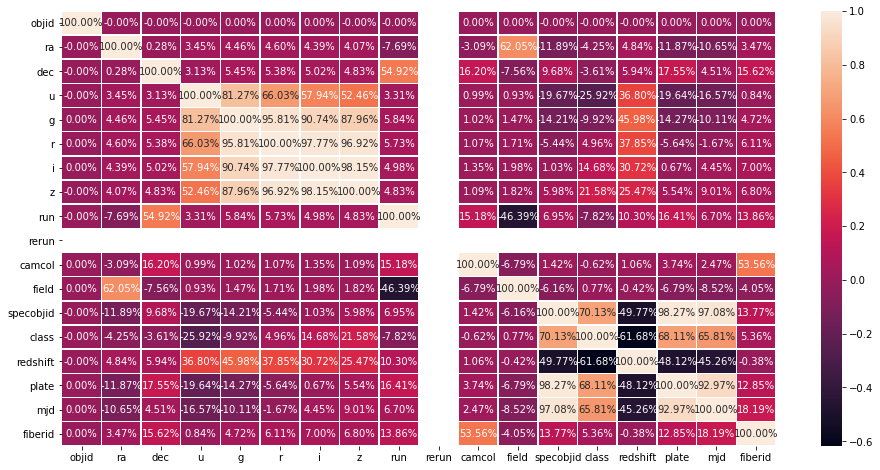

In [42]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='0.2%')

##### Heatmap shows that objid and rerun has no correlation with target column i.e class

In [43]:
df1=df.drop(['objid','rerun'],axis=1)
df1

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0.074086,-0.298528,1.324181,17.04240,15.94699,15.50342,15.22531,752,4,267,1.391174,2,-0.938967,1.326782,1.338791,491
1,0.075736,-0.286965,-0.203686,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.782518,2,-0.940055,-0.806801,-0.924403,541
2,0.077749,-0.289243,1.112203,18.19169,17.47428,17.08732,16.80125,752,4,268,-0.850654,0,0.939831,-1.017960,-0.621582,513
3,0.082435,-0.308940,-1.190591,16.60272,16.16116,15.98233,15.90438,752,4,269,1.391175,2,-0.941375,1.326782,1.338791,510
4,0.082749,-0.295227,-1.352749,16.26342,16.43869,16.55492,16.61326,752,4,269,1.391175,2,-0.924806,1.326782,1.338791,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.071857,1.336087,0.031851,17.47053,16.91508,16.68305,16.50570,1345,3,161,-0.559572,0,-0.352316,-0.299123,-0.717210,246
9996,-1.072055,1.337599,-0.703598,17.43849,17.07692,16.71661,16.69897,1345,3,162,-0.559579,0,0.889145,-0.299123,-0.717210,228
9997,-1.067315,1.337549,-0.061450,17.77784,17.51872,17.43302,17.42048,1345,3,162,1.802500,2,-0.948280,1.585300,2.518202,622
9998,-1.068766,1.338535,0.137848,17.91068,17.53152,17.36284,17.13988,1345,3,163,-0.559579,0,-0.624694,-0.299123,-0.717210,229


### Applying Standard scaller on this dataset

In [44]:
target=df['class']
x=df.drop(['class','run','camcol'],axis=1)
X=ss.fit_transform(x)
df=pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.074086,-0.298528,1.324181,-0.348559,-0.837280,-0.946058,-0.995342,0.0,-0.217630,1.391174,-0.938967,1.326782,1.343947,0.668632
1,0.0,0.075736,-0.286965,-0.203686,-0.166533,-0.154155,-0.082645,-0.026043,0.0,-0.217630,-0.782518,-0.940055,-0.806801,-0.919277,0.911012
2,0.0,0.077749,-0.289243,1.112203,0.867093,0.593154,0.441201,0.314528,0.0,-0.211479,-0.850654,0.939831,-1.017960,-0.616451,0.775279
3,0.0,0.082435,-0.308940,-1.190591,-0.813627,-0.636692,-0.526604,-0.430921,0.0,-0.205328,1.391175,-0.941375,1.326782,1.343947,0.760736
4,0.0,0.082749,-0.295227,-1.352749,-1.172519,-0.376762,-0.025101,0.158276,0.0,-0.205328,1.391175,-0.924806,1.326782,1.343947,0.770431


In [45]:
target=df1['class']
x=df1.drop(['class','run','camcol'],axis=1)
X=ss.fit_transform(x)
df1=pd.DataFrame(X)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.074086,-0.298528,1.324181,-0.348559,-0.837280,-0.946058,-0.995342,-0.217630,1.391174,-0.938967,1.326782,1.343947,0.668632
1,0.075736,-0.286965,-0.203686,-0.166533,-0.154155,-0.082645,-0.026043,-0.217630,-0.782518,-0.940055,-0.806801,-0.919277,0.911012
2,0.077749,-0.289243,1.112203,0.867093,0.593154,0.441201,0.314528,-0.211479,-0.850654,0.939831,-1.017960,-0.616451,0.775279
3,0.082435,-0.308940,-1.190591,-0.813627,-0.636692,-0.526604,-0.430921,-0.205328,1.391175,-0.941375,1.326782,1.343947,0.760736
4,0.082749,-0.295227,-1.352749,-1.172519,-0.376762,-0.025101,0.158276,-0.205328,1.391175,-0.924806,1.326782,1.343947,0.770431


# Models Generations


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [47]:
# for best random state after standard scaller
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(df1, 
                                                    target, test_size=0.30, 
                                                    random_state=i)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    if accuracy>accu:
        accu=accuracy
        best_state=i
print(f"Final accuracy is{accu} and best random state is {best_state}")

Final accuracy is0.992 and best random state is 57


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df1, 
                                                    target, test_size=0.30, 
                                                    random_state=57)

### Pipeline

In [49]:
parameters_deci_c={
 'criterion': ['gini','entropy'],
 'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [233]}

parameters_knn_c={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
#     'algorithm':['auto','ball_tree','kd_tree','brute']
    
}
parameters_svc={
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_log_reg = {'penalty':['l1', 'l2', 'elasticnet'],
                      'solver':['newton-cg','lbfgs','liblinear','sag','saga']
                     }

In [50]:
parameter_lis=[parameters_log_reg,parameters_knn_c,parameters_svc,parameters_deci_c]
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]
models_name=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='accuracy'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred)*100,'%')
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Best Parameters are : ',gsv[0].best_params_)
    print(f'Cross Validation Score is : {crv}\nModel name is {gsv}\n==============================================================================')
    if accuracy>best_score:
        best_score=accuracy
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Accuracy  Score is :  99.26666666666667 %
[[1522    3   11]
 [   8  248    0]
 [   0    0 1208]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.99      0.97      0.98       256
           2       0.99      1.00      1.00      1208

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Best Parameters are :  {'penalty': 'l1', 'solver': 'saga'}
Cross Validation Score is : 0.9830000000000001
Model name is Pipeline(steps=[('LogisticRegression',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear', 'sag',
                                                     'saga']},
   

In [51]:
######  'criterion': ['gini','entropy'], default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestClassifier(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestClassifier(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print((cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [52]:
rndtree(list(np.arange(120,170)),57)

Accuracy  Score is :  0.992
[[1526    3    7]
 [  12  244    0]
 [   2    0 1206]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.99      0.95      0.97       256
           2       0.99      1.00      1.00      1208

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

98.74285714285713
best n is  120


In [53]:
def rftree(a,b,c):
    mod=RandomForestClassifier(n_estimators=a,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print((cross_val_score(RandomForestClassifier(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [54]:
rftree(120,57,'gini')

Accuracy  Score is :  0.9926666666666667
[[1526    3    7]
 [  10  246    0]
 [   2    0 1206]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.99      0.96      0.97       256
           2       0.99      1.00      1.00      1208

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

98.81428571428572


In [55]:
rftree(120,57,'entropy')

Accuracy  Score is :  0.992
[[1526    3    7]
 [  12  244    0]
 [   2    0 1206]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.99      0.95      0.97       256
           2       0.99      1.00      1.00      1208

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

98.65714285714287


In [58]:
rfc = RandomForestClassifier(n_estimators=120,random_state=57,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120, random_state=57)

# Conclusion  Best model is Random Forest Classifier


In [59]:
import pickle
file_name='space_server.pkl'
pickle.dump(rfc,open(file_name,'wb'))